<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by Zhuo Chen for [Constellate](https://constellate.org) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).<br />
For questions/comments/improvements, email zhuo.chen@ithaka.org or nathan.kelber@ithaka.org<br />

# Data Visualization 1

This is lesson 1 of 3 in the educational series on **Data Visualization**. 

**Description:** This notebook discusses:

* What is a good visualization
* How one can lie using data visualizations
* Factors to consider when making data visualizations
* Main types of visualizations

**Use case:** For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Completion time:** 90 minutes

**Knowledge Required:** 

* Python basics ([start learning Python basics](./python-basics-1.ipynb))
* Pandas ([start learning Pandas](./pandas-1.ipynb))

**Knowledge Recommended:**

Objects, attributes and methods (start learning [object-oriented programming](./python_intermediate_4.ipynb))

**Data Format**: .csv

**Libraries Used**: pandas, geoPandas, Matplotlib

**Research Pipeline**: None

___

## Introduction

We are exposed to many kinds of visualizations in the media, including on TV, social media, newspapers, magazines, and websites. This series focuses on data visualizations designed to **inform the audience** in order to **increase their understanding** (as opposed to data visualizations used for entertainment or sales).

**The 5 Qualities of a Good Data Visualization**

In his book [The Truthful Art](http://www.thefunctionalart.com/p/the-truthful-art-book.html), Alberto Cairo proposes a five-part framework to evaluate the qualities of a data visualization. He says that a good data visualization should be:

* Truthful
* Functional
* Beautiful
* Insightful
* Enlightening

Let's examine each of these concepts.

## The 5 Qualities of a Good Data Visualization

### Truthful

Creating a good data visualization requires us to be truthful. We should seek to be honest with ourselves and our audience.

#### Being Honest with Ourselves

* Does the data cleaning and summarization create a bias toward a certain conclusion?
* Is the conclusion leading the data?

#### Being Honest with our Audience

* Does the visualization hide data?
* Does the visualization intentionally mislead the audience?
* Does the visualization unintentionally mislead the audience?

#### Example: The Hulu Drama Dopesick

In the 2021 Hulu drama series Dopesick, [visualizations misled consumers](https://www.youtube.com/watch?v=y305az3PQLk) about the dangers of opioid use.

#### Example: FOX News and the Bush Tax Cuts

Here is an example from Alberto Cairo's [How Charts Lie](http://www.thefunctionalart.com/p/reviews.html). In July 2012, Fox News used a chart to show the consequences of letting President George W. Bush's top federal tax rates expire. Notice that the percentage rate for the red bar is left out.

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz_BarTax1.png" width=500>


In this chart, the number is revealed. Is the original chart truthful?

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz_BarTax2.png" width=500>

### Functional

A visualization is functional if it helps the audience interpret the conveyed information. There are two main questions to consider when choosing a visualization:

* What purpose does the visualization serve? 
The purpose depends on defining the audience and their desired information.

* How to shape the information to help the audience achieve the purpose?
Choosing the best shape helps the audience interpret the information easily and effectively.

In [The Functional Art](http://www.thefunctionalart.com/p/about-book.html), Alberto Cairo emphasizes that functions constrain forms. Defining the function of the visualization can help you pick the right form.

#### Example: Massachusett's Workforce Data

Suppose you are interested in the workforce data in Massachusetts. You would like to find out the data for January and February of 2023 in different counties of the state. There is a specific question that you are interested in: 

**Which county saw the biggest growth in unemployment rate from January to February?**

Here are two possible visualizations:

##### Visualization 1

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz1_MAunemp_JanToFeb2023.png" width=700>

##### Visualization 2

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz1_MAunemp_JanToFeb2023BarChart.png" width=500>

Putting yourself in the shoes of the target readers helps you choose the best visualization. 

### Beautiful

When it comes to informational charts, i.e., the kind of data visualization we focus on in this series, many experts resist using visual embellishments because excessive elements can be distracting and obscure interpretation. 

Edward R. Tufte, for example, calls the embellishments in charts *chartjunk*. He argues that a good visual design communicates the most possible information using the least possible ink. On the other hand, however, some research has shown that embellishments can be useful, aiding comprehension and recall ([Bateman et al. 2010](https://www.researchgate.net/publication/221517808_Useful_Junk_The_effects_of_visual_embellishment_on_comprehension_and_memorability_of_charts)). 

#### Example: Diamond 

Let's take a look at an example from [Bateman et al.'s](https://www.researchgate.net/publication/221517808_Useful_Junk_The_effects_of_visual_embellishment_on_comprehension_and_memorability_of_charts) paper. There are two charts in this paper that present exactly the same information: the price change of a one-carat D-flawless diamond from 1978 - 1982. If you are a reader, which chart do you think is more effective in terms of conveying this information? 

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz1_DiamondMinimalistDesign.png" width=500>

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz1_DiamondChartjunk.png" width=500>

Source: Bateman, S., Mandryk, R. L., Gutwin, C., Genest, A., McDine, D., & Brooks, C. (2010, April). Useful junk? The effects of visual embellishment on comprehension and memorability of charts. In *Proceedings of the SIGCHI conference on human factors in computing systems* (pp. 2573-2582).

#### The Beauty Paradox

In his book [The Functional Art](http://www.thefunctionalart.com/p/about-book.html), Alberto Cairo uses the term "the beauty paradox" to describe the difficult choice between the minimalist design and the embellished design. If you ask which design is better, there is no absolute right answer. It depends on the audience, their knowledge, taste, expectations, etc. 

Despite the seeming conflict between the two approaches to visual design, however, Alberto Cairo argues that a middle ground can be found between them. After all, the ultimate goals of making a visual deisgn are shared by the two approaches. That is, a visual design presents information and it helps the readers explore that information. Using these two goals as guiding principles, the creators will achieve a balance between radical minimalism and the so-called chartjunk kind of design. 

### Insightful

According to [Chang et al.](https://viscenter.charlotte.edu/sites/viscenter.charlotte.edu/files/CVC-UNCC-08-34_0.pdf)(2009), there are several kinds of insight in visualizations. One is **spontaneous insight**. Spontaneous insight often comes directly from the graphic summary of the data. For example, in the previous section, we have seen two graphics showing the price change of a one-carat D-flawless diamond from 1978 - 1982. We immediately noticed the spike in 1980. This is the spontaneous insight we got from the graphics.

Another kind of insight is **knowledge-building insight**. When we play with an interactive visualization, it allows us to explore the information in a gradual way and in this deliberate process of exploration, we often get more knowledge. 

#### Example: PhDs and Gender

Here is an example from [The Truthful Art](http://www.thefunctionalart.com/p/the-truthful-art-book.html). 

https://www.scientificamerican.com/article/how-nations-fare-in-phds-by-sex-interactive1/

On this page you find an interactive graphics that shows the PhD gender gap by country. If we do not categorize the areas of the PhD degrees, you see that the US does really a good job in awarding about the same percentage of PhD degrees to both females and males. 

Click the arrow to the left of "All PhDs" to filter on "Social and Behavioral." What do you find? 

Click the arrow to filter on "Math & Computer Science." What do you find?

### Enlightening

An enlightening visualization "sheds light" on a topic of human interest. In the PhD gender gap visualization, for example, the topic of gender is central to discussions on academic and social equity. Calling policy-makers' attention to such a gender gap may lead to efforts to promote gender equity in the education of science and engineering.

## Some of the main types of data visualizations

In this section, we are going to briefly review the main types of charts and graphs. 

### Scatterplot

A scatterplot can help us visualize the relationship between variables. Moreover, it helps us to identify unusual cases.

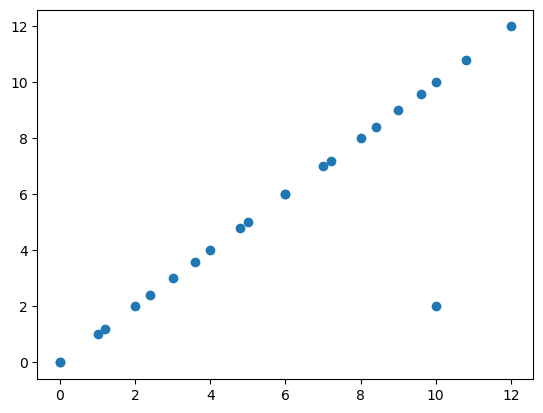

In [2]:
### import pyplot
import matplotlib.pyplot as plt

### a mock example
data = [(x, x) for x in range(0, 11)] + [(1.2*x, 1.2*x) for x in range(0, 11)]
data.append((10, 2))

x_values = [t[0] for t in data]
y_values = [t[1] for t in data]

# make a scatter plot
plt.scatter(x_values, y_values);

### Line graphs

A line graph uses lines to connect individual data points. It is often used to display the relation between two continuous variables. For example, it can be used to display trends in events over time. 

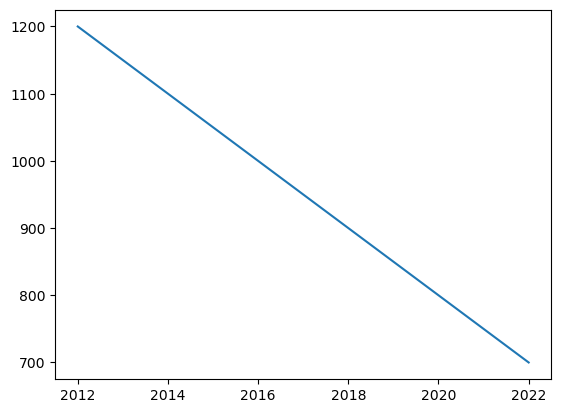

In [3]:
### A mock example
x_values = range(2012, 2023)
y_values = range(1200, 650, -50)

# make a line graph
plt.plot(x_values, y_values);

### Bar charts

Bar charts are useful when you want to compare categories in counts, sums, means or other summary values. In a bar chart, you will have one categorial variable and one numerical value. In a vertical bar chart, the x-axis holds the categorical variable and the y-axis holds the numerical value while in a horizontal bar chart, the opposite is true. 

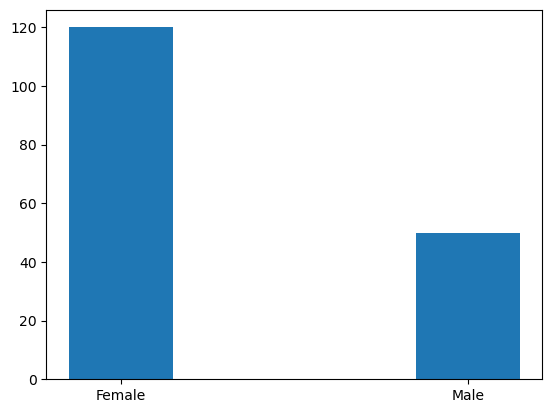

In [4]:
### A mock example of vertical bar chart
x_values = ['Female', 'Male']
y_values = [120, 50]
plt.bar(x_values, y_values, width=0.3);

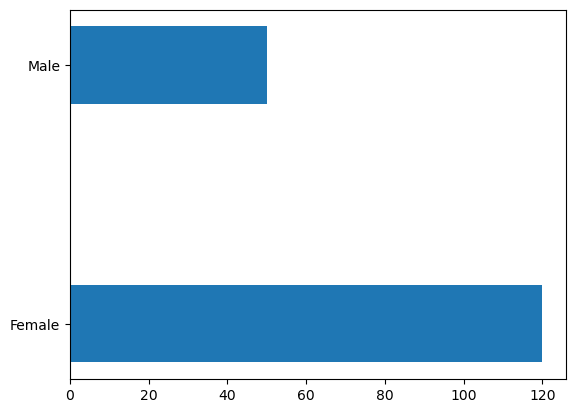

In [5]:
### A mock example of horizontal bar chart
y_values = ['Female', 'Male']
x_values = [120, 50]
plt.barh(y_values, x_values, height=0.3);

### Histogram

Histograms are used to display frequency distributions. For example, suppose you have 50 students and you would like to use a histogram to show the distribution of their grades in the most recent English test. 

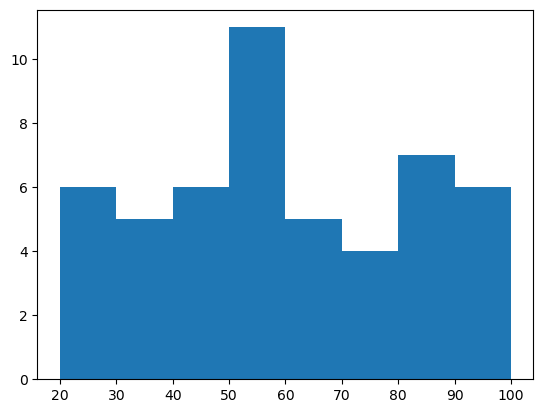

In [6]:
### A mock example of histogram
import numpy as np
np.random.seed(0)
x_values = np.random.randint(20, 100, 50)
bins = range(20, 110, 10)
plt.hist(x_values, bins=bins);

### Pie chart
A pie chart is used to show how a total amount is divided between levels of a categorical variable. Each wedge of the pie corresponds to one of the levels of the categorical variable. Suppose you divide your study time into chunks and spend a certain chunk of time on a certain subject. Now, you would like to make a pie chart to display how much time you spent on each of the four subject: Math, English, History, Biology. 

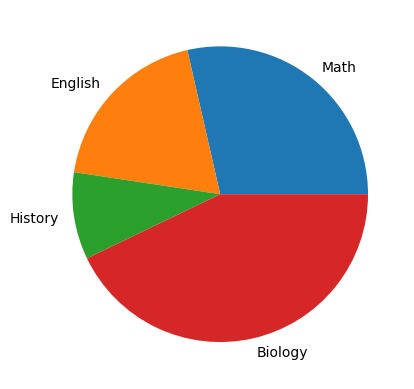

In [7]:
### A mock example 
labels = ['Math', 'English', 'History', 'Biology']
sizes = [30, 20, 10, 45]
plt.pie(sizes, labels=labels);

There are many more types of data visualization. Here we have only briefly reviewed some of the main types of visualizations. When you choose a certain type of chart to display your data, always ask yourself what form will best help the audience interpret the conveyed information.

## Code for the visualizations in the Functional section
### Visualization 1

In [8]:
# Download the data
import urllib.request
import zipfile
from pathlib import Path

urls = ['https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz1_CountyComparison_preprocessed.csv',
       'https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/counties.zip']
for url in urls:
    urllib.request.urlretrieve(url, './data/' + url.rsplit('/', 1)[-1])
    
with zipfile.ZipFile("./data/counties.zip", "r") as zip_ref:
    zip_ref.extractall("./data/counties")

countyzip_path = Path.cwd() / 'data' / 'counties.zip'
countyzip_path.unlink()
print('Samples files retrieved.')

Samples files retrieved.


In [9]:
# Install geopandas
!pip install geopandas

In [10]:
# # use magic function to set the backend
%matplotlib inline

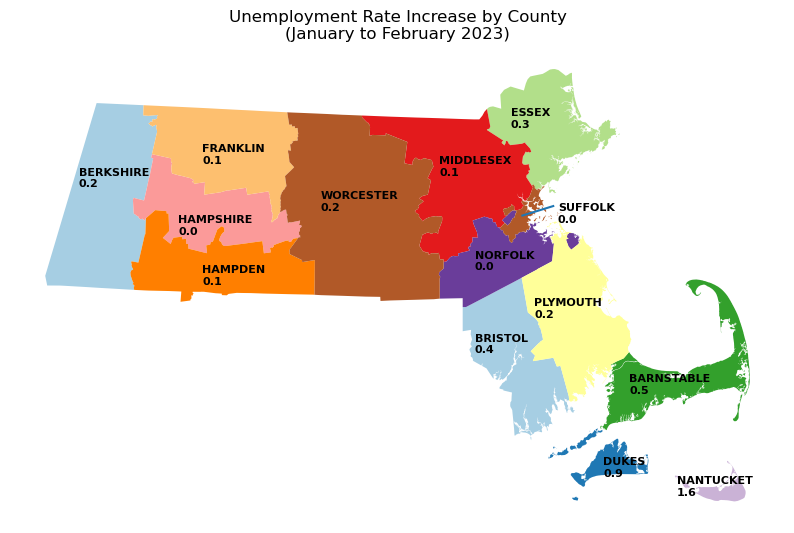

In [11]:
# Plot the unemployment rate increase by county in MA 
# On a county map of MA

import pandas as pd
import geopandas as gpd

# Read in the unemployment data in Nov&Dec of 2022
unemp = pd.read_csv('./data/DataViz1_CountyComparison_preprocessed.csv') 

# Create a new column storing the change in umemployment rate
unemp['Difference'] = round(unemp['Feb Rate'].astype(float) - unemp['Jan Rate'].astype(float),2)

# Remove the unnecessary columns
unemp = unemp[['COUNTY', 'Difference']]

# Preprocess the COUNTY column to prepare for later merging
unemp['COUNTY'] = unemp['COUNTY'].str.upper()

# Read in the geo data
geo = gpd.read_file('./data/counties/COUNTIES_POLYM.shp')

# Remove the unnecessary column
geo = geo[['COUNTY', 'geometry']]

# Merge the two dfs
geo_unemp = geo.merge(unemp, on='COUNTY')

# Add the longitude and latitude info for each county
# to be used to add county name and unemployment data
# to the map later
geo_unemp['Longitude'] = [48000,
                          215000, 
                          269000, 
                          230000, 
                          280000, 
                          90000, 
                          200000, 
                          100000, 
                          100000, 
                          300000, 
                          215000, 
                          240000,
                          250000,
                          150000]

geo_unemp['Latitude'] = [910000,
                         840000, 
                         788000, 
                         935000, 
                         823000, 
                         890000, 
                         915000, 
                         920000, 
                         869000, 
                         780000, 
                         875000, 
                         855000,
                         895000,
                         900000]

# Plot the map
ax_geo = geo_unemp.plot(figsize=(10, 10),scheme="quantiles", cmap='Paired')

# Add the county name and unemployment rise/drop on the map
for i in range(len(geo_unemp)):
    ax_geo.text(geo_unemp.Longitude[i],
             geo_unemp.Latitude[i],
             f"{geo_unemp.COUNTY[i]}\n{geo_unemp.Difference[i]}",
             size=8, weight='bold', color='black')

# Add a line in the plot for Suffolk county
ax_geo.plot([235000, 248000], [898000, 902000])

# Add a title to the plot
ax_geo.set_title('Unemployment Rate Increase by County\n(January to February 2023)',fontsize=12)

# Remove the ticks
ax_geo.set_xticks([])
ax_geo.set_yticks([])

# Remove the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Save the figure
ax_geo.figure.savefig('MA_UnempRateJanToFeb2023.png');

### Visualization 2

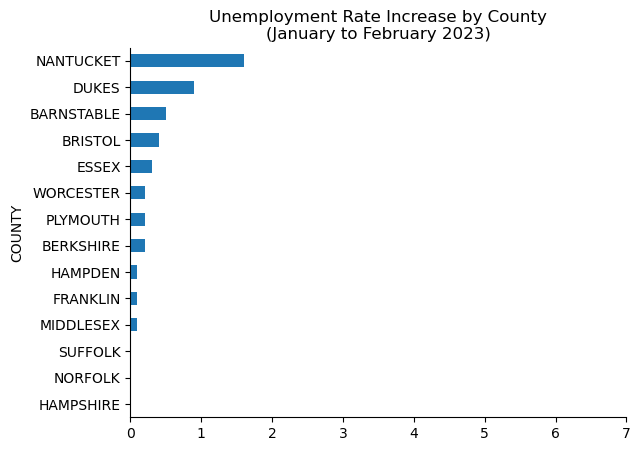

In [12]:
# Prepare the data to be ploted
geo_unemp = geo_unemp.sort_values(by='Difference')
 
# Specify the x axis and y axis data
ax_barh = geo_unemp.plot(x='COUNTY', y='Difference', kind='barh', legend=None)

# Set the title
ax_barh.set_title('Unemployment Rate Increase by County\n(January to February 2023)',fontsize=12)

# Remove the unnecessary spines in the frame
ax_barh.spines['top'].set_visible(False)
ax_barh.spines['right'].set_visible(False);

# set the x axis limitation
ax_barh.set_xlim(0, 7)
plt.savefig('DataViz1_MAunemp_bar.png');

<h4 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h4>

Before making a data visualization, we always need to preprocess the raw data to prepare for plot-drawing. In this notebook, we have seen an example using unemployment data from Massachusetts. In that example, the sample .csv file was preprocessed in advance. 

Try downloading the original .csv file from [Mass.gov](https://lmi.dua.eol.mass.gov/lmi/LaborForceAndUnemployment/CountyComparison) and preprocessing it. If you're having trouble, you can always return to the [Pandas Series](./pandas-1.ipynb) to review.

___


In [ ]:
# Download the raw file from the link Mass.gov
# Save it to the data folder


In [ ]:
# Create a dataframe from the raw file


In [ ]:
# Use .head() method to take a look at 
# the df from the preprocessed file and the df from the raw file



In [ ]:
# Use what you have learned from Pandas series
# to process the df from the raw file to make 
# it the same as the df from the preprocessed file


## Lesson Complete

Congratulations! You have completed *Data Visualization 1*.

### Start Next Lesson: [Data Visualization 2](./DataViz2.ipynb)
___

## References

Bateman, S., Mandryk, R. L., Gutwin, C., Genest, A., McDine, D., & Brooks, C. (2010, April). Useful junk? The effects of visual embellishment on comprehension and memorability of charts. In *Proceedings of the SIGCHI conference on human factors in computing systems* (pp. 2573-2582).

Cairo, A. (2012). *The Functional Art: An introduction to information graphics and visualization*. New Riders.

Cairo, A. (2016). *The Truthful Art: Data, charts, and maps for communication*. New Riders.

Cairo, A. (2019). *How Charts Lie: Getting smarter about visual information*. WW Norton & Company.

Chang, R., Ziemkiewicz, C., Green, T. M., & Ribarsky, W. (2009). Defining insight for visual analytics. *IEEE Computer Graphics and Applications, 29*(2), 14-17.

## Exercise Solutions
Here are the solution for the coding exercise in this lesson.

### Use Pandas to preprocess a df from an example .csv file

In [14]:
# Download the raw file
import urllib.request
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz1_CountyComparisonUnempRaw.csv'
urllib.request.urlretrieve(url, './data/' + url.rsplit('/', 1)[-1])
print('Raw file retrieved.')

Raw file retrieved.


In [15]:
# Create a dataframe from the raw file and 
# take a look at it using .head()
raw = pd.read_csv('./data/CountyComparisonCSV')
raw.head()

,Location,Labor Force,Labor Force.1,Labor Force.2,Employment,Employment.1,Employment.2,Unemployment,Unemployment.1,Unemployment.2,Rate,Rate.1,Rate.2
0,NaN,Feb-2023,Jan-2023,Feb-2022,Feb-2023,Jan-2023,Feb-2022,Feb-2023,Jan-2023,Feb-2022,Feb-2023,Jan-2023,Feb-2022
1,Massachusetts,3763398,3759154,3752740,3604461,3606002,3590351,158937,153152,162389,4.2,4.1,4.3
2,Barnstable County,108646,108515,106665,100791,101282,98713,7855,7233,7952,7.2,6.7,7.5
3,Berkshire County,61320,61241,62226,58158,58163,58860,3162,3078,3366,5.2,5.0,5.4
4,Bristol County,300028,299672,301282,282916,283720,283505,17112,15952,17777,5.7,5.3,5.9


In [16]:
### Preprocess the file

col_n = raw.shape[1] # Get how many columns there are

# Drop the columns with 2022 data
col_to_drop = range(3, col_n, 3) 
raw = raw.drop(raw.columns[col_to_drop], axis=1)

# Drop the first two rows
raw = raw.drop([0, 1]).reset_index(drop=True)

In [17]:
# Rename the columns
col_names = [f'Jan {name}' if name.endswith('.1') else name for name in raw.columns]
col_names = [name.replace('.1', '') for name in col_names]
add_feb = range(1, 9, 2)
col_names = [f'Feb {name}' if col_names.index(name) in add_feb else name for name in col_names]
col_names[0] = 'COUNTY'
raw.columns = col_names

In [18]:
# Upper case all the county names in the first column
raw['COUNTY'] = [county.split()[0].upper() for county in raw['COUNTY']]

In [19]:
# Take a look at the resulting df
raw

,COUNTY,Feb Labor Force,Jan Labor Force,Feb Employment,Jan Employment,Feb Unemployment,Jan Unemployment,Feb Rate,Jan Rate
0,BARNSTABLE,108646,108515,100791,101282,7855,7233,7.2,6.7
1,BERKSHIRE,61320,61241,58158,58163,3162,3078,5.2,5.0
2,BRISTOL,300028,299672,282916,283720,17112,15952,5.7,5.3
3,DUKES,8403,8358,7631,7662,772,696,9.2,8.3
4,ESSEX,424616,424920,406130,407347,18486,17573,4.4,4.1
5,FRANKLIN,40085,39904,38528,38398,1557,1506,3.9,3.8
6,HAMPDEN,225735,224172,213794,212543,11941,11629,5.3,5.2
7,HAMPSHIRE,90085,89585,86743,86231,3342,3354,3.7,3.7
8,MIDDLESEX,914953,915261,885052,885816,29901,29445,3.3,3.2
9,NANTUCKET,6837,6715,5765,5766,1072,949,15.7,14.1
